In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Preamble 
We have noticed that glucose levels has a strong relation with determing if a person is diabetic or not. 

This note book will look at other features when compared to diabetic or not.

link: https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2007


# Data Preparation

In [2]:
def is_diabetic(row):
    '''
    This is classification based on survey. 
    DIQ010 --> This is a survey of diabetic or not.
    '''
    if row['DIQ010']==1:
        return 1
    else:
        return 0

def merge_data_diabetes(df_one,df_two):
    '''
    This will make a df for classification.
    '''
    df_one['HasDiabetes'] = df_one.apply(lambda row: is_diabetic(row), axis=1)
    df_one = df_one[['SEQN','HasDiabetes']]
    df_merged = df_one.merge(right=df_two,on='SEQN',how='inner')
    return df_merged

def build_diabetes_classification(df):
    '''
    Build the classification.
    '''
    df['HasDiabetes'] = df.apply(lambda row: is_diabetic(row), axis=1)
    df = df[['SEQN','HasDiabetes']]
    return df

def diabetes_corr(df_merged):
    correlation = df_merged.corr()
    return correlation['HasDiabetes'].abs().sort_values(ascending=False)

def import_dataset(name,col_dic=None):
    df = pd.read_sas(base_dir+name+'.XPT')
    if col_dic==None:
        return df
    else: 
        return df[[*col_dic]].rename(columns=col_dic)
    
def expand_col(df,col_name,dic_col_val):
    for new_col in dic_col_val:
        df[new_col] = 0
        df.loc[df[col_name]==dic_col_val[new_col],new_col] = 1
    return df

Diabetic classifier options: 
* diabetic survey --> may have survey records of people eating and living clean after being diagnosed. 
* glycohemoglobin --> above 6.5% indicates diabetic person. 
* fasting glucose level --> indicator to diabetic person. 

Datasets interested in: 
* demographic information
    * Has age
* overweight --> MCQ_E --> MCQ080
* Fasting Glucose (mg/dL) --> GLU_E --> LBXGLU
* Dietry --> nutrient information --> DR1TOT_E & DR2TOT_E
* Occupation --> OCQ_E
* Income --> INQ_E
* Food Security --> FSQ_E

References: Influece Factors: 
* https://www.niddk.nih.gov/health-information/diabetes/overview/risk-factors-type-2-diabetes

Blood pressure: 
* Hard to obtain if you don't have a BP device. 
* But, certain groups of society will have a BP device. Therefore, it is practical to use BP as a feature. 
* Also, if a person has their recent recording from there doctor, they could possible us that reading. 

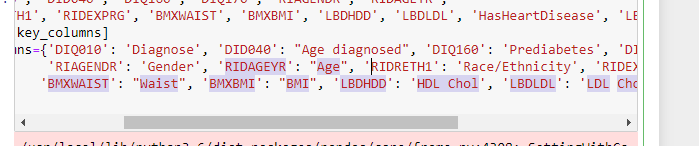

Modeling notes:
* Classifications to be put on sperate columns. 
* zero and one values need to be changed to one and two values. 

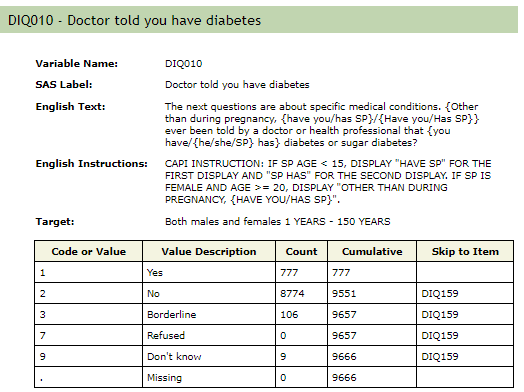

In [3]:
# OLD IMPORTS
# # blood pressure questionaire
# df_bp = pd.read_sas('./EDA/CDC/shotgun_approach/BPQ_E.XPT')
# # blood pressure results
# df_bpr = pd.read_sas('./EDA/CDC/Blood_pressure/BPX_E.XPT')
# # medical conditions
# df_mc = pd.read_sas('./EDA/CDC/shotgun_approach/MCQ_E.XPT')

In [4]:
# I want to selectively import features rather than chucking in variables.
# df that will be used to classify diabetes
df_diabetes = pd.read_sas('./EDA/CDC/Questionare/Diabetes/DIQ_E.XPT') #https://wwwn.cdc.gov/Nchs/Nhanes/2007-2008/DIQ_E.htm#DIQ010
df_diabetes = build_diabetes_classification(df_diabetes)
df_diabetes.head()

,SEQN,HasDiabetes
0,41475.0,0
1,41476.0,0
2,41477.0,1
3,41478.0,0
4,41479.0,0


In [5]:
df_glyc_raw = pd.read_sas('./EDA/CDC/Glycohemoglobin/GHB_E.XPT')
df_glyc_raw.LBXGH.loc[df_glyc_raw.LBXGH<6.5] = 0
df_glyc_raw.LBXGH.loc[df_glyc_raw.LBXGH>=6.5] = 1
df_glyc_raw.head()

,SEQN,LBXGH
0,41475.0,0.0
1,41477.0,1.0
2,41479.0,0.0
3,41481.0,NaN
4,41482.0,1.0


In [6]:
df = df_diabetes.merge(right=df_glyc_raw,on='SEQN',how='outer',indicator='indicator')
# df_diabetes_combined.groupby(['indicator']).count()
# https://www.uofmhealth.org/health-library/hw8432
# We will want to keep the whole merge. 
df.loc[df.indicator=='right_only']

,SEQN,HasDiabetes,LBXGH,indicator


In [7]:
df.loc[df.indicator=='left_only']

,SEQN,HasDiabetes,LBXGH,indicator
1,41476.0,0,NaN,left_only
3,41478.0,0,NaN,left_only
5,41480.0,0,NaN,left_only
12,41488.0,0,NaN,left_only
15,41491.0,0,NaN,left_only
...,...,...,...,...
9643,51600.0,0,NaN,left_only
9644,51601.0,0,NaN,left_only
9645,51602.0,0,NaN,left_only
9649,51607.0,0,NaN,left_only


In [8]:
df.loc[(df.indicator=='left_only')&(df.HasDiabetes==1)]

,SEQN,HasDiabetes,LBXGH,indicator
799,42316.0,1,NaN,left_only
1128,42663.0,1,NaN,left_only
1377,42928.0,1,NaN,left_only
1636,43200.0,1,NaN,left_only
1745,43312.0,1,NaN,left_only
1829,43400.0,1,NaN,left_only
1857,43429.0,1,NaN,left_only
2062,43643.0,1,NaN,left_only
2133,43722.0,1,NaN,left_only
2174,43766.0,1,NaN,left_only


In [9]:
# (not(df.HasDiabetes.isna()))
df_both = df.loc[(df.indicator=='both')]

# Nulls in HasDiabetes are being filled
df_both.loc[(df_both.HasDiabetes.isna())&(df_both.LBXGH.notna()),'HasDiabetes'] = \
df_both.loc[(df_both.HasDiabetes.isna())&(df_both.LBXGH.notna()),'LBXGH']

# 0 in HasDiabetes are being filled with 1s from LBXGH
df_both.loc[(df_both.HasDiabetes==0)&(df_both.LBXGH==1),'HasDiabetes'] = \
df_both.loc[(df_both.HasDiabetes==0)&(df_both.LBXGH==1),'LBXGH']

df.loc[(df.indicator=='both')] = df_both

c:\python39\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
c:\python39\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [10]:
df.loc[df.indicator=='both']

,SEQN,HasDiabetes,LBXGH,indicator
0,41475.0,0.0,0.0,both
2,41477.0,1.0,1.0,both
4,41479.0,0.0,0.0,both
6,41481.0,0.0,NaN,both
7,41482.0,1.0,1.0,both
...,...,...,...,...
9661,51619.0,0.0,0.0,both
9662,51620.0,0.0,0.0,both
9663,51621.0,0.0,0.0,both
9664,51622.0,0.0,0.0,both


In [11]:
df.loc[df.indicator=='right_only']

,SEQN,HasDiabetes,LBXGH,indicator


In [12]:
df.loc[(df.indicator=='right_only'),'HasDiabetes'] = df.loc[(df.indicator=='right_only'),'LBXGH']

# Assign df_classifer

In [13]:
df_classifier = df
df_classifier = df_classifier.drop(columns=['LBXGH','indicator'])

# Need to change 1 to 2 and 0 to 1
# df_classifier.loc[df_classifier.HasDiabetes==1,'HasDiabetes'] = 2
# df_classifier.loc[df_classifier.HasDiabetes==0,'HasDiabetes'] = 1
df_classifier

,SEQN,HasDiabetes
0,41475.0,0.0
1,41476.0,0.0
2,41477.0,1.0
3,41478.0,0.0
4,41479.0,0.0
...,...,...
9661,51619.0,0.0
9662,51620.0,0.0
9663,51621.0,0.0
9664,51622.0,0.0


# Features

In [14]:
base_dir = './EDA/CDC/shotgun_approach/'
# demographic
df_demo = import_dataset('DEMO_E',{
    'SEQN':'SEQN',
    'RIDRETH1':'Ethnicity',
    'RIDAGEYR':'Age_in_yrs_at_exam', # Ages above 80yrs are lumped with 80yrs.
#     'INDFMPIR':'Ratio_of_family_income_to_poverty'
})

df_demo = expand_col(df_demo,'Ethnicity',{
    'Mexican_American':1,
    'Other_Hispanic':2,
    'Non-Hispanic_White':3,
    'Non-Hispanic_Black':4,
    'Other_and_Multi-Racial':5,
})

df_demo.head()

,SEQN,Ethnicity,Age_in_yrs_at_exam,Mexican_American,Other_Hispanic,Non-Hispanic_White,Non-Hispanic_Black,Other_and_Multi-Racial
0,41475.0,5.0,62.0,0,0,0,0,1
1,41476.0,5.0,6.0,0,0,0,0,1
2,41477.0,3.0,71.0,0,0,1,0,0
3,41478.0,3.0,1.0,0,0,1,0,0
4,41479.0,1.0,52.0,1,0,0,0,0


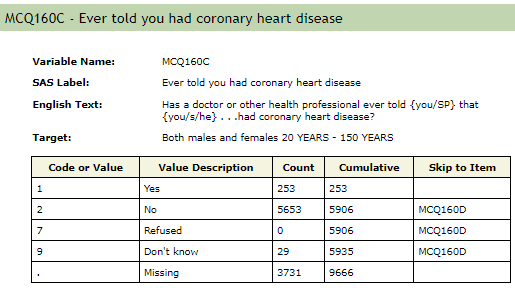

In [ ]:
# Medical Question: overweight, stroke
df_medical_qs = import_dataset('MCQ_E',{
    'SEQN':'SEQN',
    'MCQ080':'Overweight',
    'MCQ160C':'Coronary_heart_disease'
})

In [104]:
# df_medical_qs = expand_col(df_medical_qs,'Overweight',{
#     'Yes_overweight':1,
#     'No_overweight':2
# })

df_medical_qs.loc[df_medical_qs.Overweight==2,'No_overweight'] = 0
df_medical_qs.loc[df_medical_qs.Overweight==9,'Overweight'] = np.nan
df_medical_qs

,SEQN,Overweight,Coronary_heart_disease,No_overweight
0,41475.0,1.0,0.0,NaN
1,41476.0,NaN,NaN,NaN
2,41477.0,2.0,0.0,0.0
3,41478.0,NaN,NaN,NaN
4,41479.0,2.0,0.0,0.0
...,...,...,...,...
9661,51619.0,1.0,0.0,NaN
9662,51620.0,2.0,0.0,0.0
9663,51621.0,2.0,NaN,0.0
9664,51622.0,1.0,0.0,NaN


In [105]:
# df_medical_qs = expand_col(df_medical_qs,'Coronary_heart_disease',{
#     'Coronary_yes':1,
#     'Coronary_no':2
# })

df_medical_qs.loc[df_medical_qs.Coronary_heart_disease==2,'Coronary_heart_disease'] = 0
df_medical_qs.loc[df_medical_qs.Coronary_heart_disease==9,'Coronary_heart_disease'] = np.nan

df_medical_qs.head()

,SEQN,Overweight,Coronary_heart_disease,No_overweight
0,41475.0,1.0,0.0,NaN
1,41476.0,NaN,NaN,NaN
2,41477.0,2.0,0.0,0.0
3,41478.0,NaN,NaN,NaN
4,41479.0,2.0,0.0,0.0


In [106]:
# BMI
df_bmi = import_dataset('BMX_E',{
    'SEQN':'SEQN',
    'BMXWAIST':'Waist_cm',
    'BMXBMI':'Body_mass_index_kgpm2'
})

df_bmi.head()

,SEQN,Waist_cm,Body_mass_index_kgpm2
0,41475.0,156.3,58.04
1,41476.0,52.7,15.18
2,41477.0,109.5,30.05
3,41478.0,NaN,NaN
4,41479.0,95.4,27.56


In [107]:
# Fasting Glucose levels GLU_E:LBXGLU
df_fasting_glucose = pd.read_sas(base_dir+'GLU_E.XPT')[['SEQN','LBXGLU']].rename(columns={'LBXGLU':'Fasting_glucose'})
# df_fasting_glucose.Fasting_glucose.hist()
df_fasting_glucose.head()

,SEQN,Fasting_glucose
0,41479.0,113.0
1,41481.0,NaN
2,41485.0,97.0
3,41486.0,123.0
4,41487.0,108.0


In [108]:
df_food_security = import_dataset('FSQ_E',{
    'SEQN':'SEQN',
#     'FSD032A':'Worried_run_out_of_food',
    'FSD032C':'Aford_balance_meals'
#     'FSDAD':'Adult_food_security'
#     'FSD431':'Hungry'
})
df_food_security = expand_col(df_food_security,'Aford_balance_meals',{
    'Aford_balance_meals_Often_true':1,
    'Aford_balance_meals_Sometimes_true':2,
    'Aford_balance_meals_Never_true':3
})
df_food_security.head()

,SEQN,Aford_balance_meals,Aford_balance_meals_Often_true,Aford_balance_meals_Sometimes_true,Aford_balance_meals_Never_true
0,41475.0,3.0,0,0,1
1,41476.0,3.0,0,0,1
2,41477.0,3.0,0,0,1
3,41478.0,2.0,0,1,0
4,41479.0,3.0,0,0,1


In [109]:
df_day_one_diet = import_dataset('DR1TOT_E',{
    'SEQN':'SEQN',
    'DR1TKCAL':'Energy', 
})

In [110]:
# HDL 
df_hdl = import_dataset('HDL_E',{
    'SEQN':'SEQN',
    'LBDHDD':'HDL_cholesterol'
})

df_hdl.head()

,SEQN,HDL_cholesterol
0,41475.0,47.0
1,41476.0,45.0
2,41477.0,34.0
3,41479.0,47.0
4,41480.0,NaN


In [111]:
# LDL
df_ldl = import_dataset('TRIGLY_E',{
    'SEQN':'SEQN',
    'LBDLDL':'LDL_cholesterol'
})

df_ldl.head()

,SEQN,LDL_cholesterol
0,41479.0,121.0
1,41481.0,NaN
2,41485.0,119.0
3,41486.0,110.0
4,41487.0,105.0


In [112]:
# df_depression = import_dataset('DPQ_E',{
#     'DPQ020':''
# })

In [113]:
key = 'SEQN'

df_merged = df_classifier.merge(right=df_demo,on=key,how='inner')
df_merged = df_merged.merge(right=df_medical_qs,on=key,how='inner')
df_merged = df_merged.merge(right=df_bmi,on=key,how='inner')
df_merged = df_merged.merge(right=df_fasting_glucose,on=key,how='inner')
df_merged = df_merged.merge(right=df_food_security,on=key,how='inner')
df_merged = df_merged.merge(right=df_day_one_diet,on=key,how='inner')
df_merged = df_merged.merge(right=df_hdl,on=key,how='inner')
df_merged = df_merged.merge(right=df_ldl,on=key,how='inner')

df_merged.dtypes

SEQN                                  float64
HasDiabetes                           float64
Ethnicity                             float64
Age_in_yrs_at_exam                    float64
Mexican_American                        int64
Other_Hispanic                          int64
Non-Hispanic_White                      int64
Non-Hispanic_Black                      int64
Other_and_Multi-Racial                  int64
Overweight                            float64
Coronary_heart_disease                float64
No_overweight                         float64
Waist_cm                              float64
Body_mass_index_kgpm2                 float64
Fasting_glucose                       float64
Aford_balance_meals                   float64
Aford_balance_meals_Often_true          int64
Aford_balance_meals_Sometimes_true      int64
Aford_balance_meals_Never_true          int64
Energy                                float64
HDL_cholesterol                       float64
LDL_cholesterol                   

In [114]:
df_merged.columns

Index(['SEQN', 'HasDiabetes', 'Ethnicity', 'Age_in_yrs_at_exam',
       'Mexican_American', 'Other_Hispanic', 'Non-Hispanic_White',
       'Non-Hispanic_Black', 'Other_and_Multi-Racial', 'Overweight',
       'Coronary_heart_disease', 'No_overweight', 'Waist_cm',
       'Body_mass_index_kgpm2', 'Fasting_glucose', 'Aford_balance_meals',
       'Aford_balance_meals_Often_true', 'Aford_balance_meals_Sometimes_true',
       'Aford_balance_meals_Never_true', 'Energy', 'HDL_cholesterol',
       'LDL_cholesterol'],
      dtype='object')

In [116]:
# OPTION 1: Drop Table Method
# col_drop = [
#     'SEQN',
#     'Ethnicity',
#     'Overweight',
#     'Waist_cm',
#     'Body_mass_index_kgpm2',
#     'Fasting_glucose',
#     'Aford_balance_meals'
#     'Energy'
# ]
# df_merged = df_merged.drop(columns=col_drop)

# OPTION 2: Select Features Method
df_merged = df_merged[['HasDiabetes', 'Age_in_yrs_at_exam',
       'Non-Hispanic_White',
       'Non-Hispanic_Black', 'Other_and_Multi-Racial',
       'Overweight', 'Waist_cm',
       'Aford_balance_meals_Often_true', 'Aford_balance_meals_Sometimes_true',
       'Aford_balance_meals_Never_true', 'Energy', 'HDL_cholesterol', 'LDL_cholesterol',
        'Coronary_heart_disease', #'Fasting_glucose','Body_mass_index_kgpm2', 'Mexican_American', 'Other_Hispanic'
]]

# Summary
df_merged.dtypes

HasDiabetes                           float64
Age_in_yrs_at_exam                    float64
Non-Hispanic_White                      int64
Non-Hispanic_Black                      int64
Other_and_Multi-Racial                  int64
Overweight                            float64
Waist_cm                              float64
Aford_balance_meals_Often_true          int64
Aford_balance_meals_Sometimes_true      int64
Aford_balance_meals_Never_true          int64
Energy                                float64
HDL_cholesterol                       float64
LDL_cholesterol                       float64
Coronary_heart_disease                float64
dtype: object

In [117]:
# Dropping NaNs
df_merged = df_merged.dropna()
df_merged

,HasDiabetes,Age_in_yrs_at_exam,Non-Hispanic_White,Non-Hispanic_Black,Other_and_Multi-Racial,Overweight,Waist_cm,Aford_balance_meals_Often_true,Aford_balance_meals_Sometimes_true,Aford_balance_meals_Never_true,Energy,HDL_cholesterol,LDL_cholesterol,Coronary_heart_disease
0,0.0,52.0,0,0,0,2.0,95.4,0,0,1,2910.0,47.0,121.0,0.0
2,0.0,30.0,0,0,0,2.0,89.7,0,0,1,1308.0,35.0,119.0,0.0
3,0.0,61.0,0,0,0,1.0,97.0,0,0,1,1547.0,37.0,110.0,0.0
4,0.0,27.0,0,0,1,2.0,82.9,0,0,1,1790.0,37.0,105.0,0.0
5,0.0,40.0,0,0,0,1.0,109.2,0,0,1,2091.0,62.0,106.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3310,1.0,60.0,1,0,0,1.0,140.5,0,0,1,1777.0,72.0,76.0,0.0
3311,0.0,71.0,0,0,0,2.0,107.4,0,0,1,1031.0,68.0,88.0,0.0
3312,0.0,48.0,1,0,0,2.0,94.2,0,0,1,2495.0,47.0,124.0,0.0
3313,0.0,50.0,1,0,0,2.0,101.1,0,0,1,1787.0,41.0,158.0,0.0


In [118]:
df_merged.corr()['HasDiabetes'].abs().sort_values(ascending=False)

HasDiabetes                           1.000000
Age_in_yrs_at_exam                    0.272959
Waist_cm                              0.269718
Overweight                            0.237820
Coronary_heart_disease                0.126798
Energy                                0.125768
LDL_cholesterol                       0.118982
HDL_cholesterol                       0.106908
Non-Hispanic_Black                    0.103728
Non-Hispanic_White                    0.063080
Other_and_Multi-Racial                0.041624
Aford_balance_meals_Sometimes_true    0.026722
Aford_balance_meals_Never_true        0.022240
Aford_balance_meals_Often_true        0.015383
Name: HasDiabetes, dtype: float64

In [119]:
def print_change_in_rows(df_one,df_two): 
    original_rows = df_one.shape[0]
    final_rows = df_two.shape[0]
    change_in_rows = original_rows-final_rows
    percentage_change = round((1-final_rows/original_rows)*100)
    print('The change in rows is {}'.format(change_in_rows))
    print('The percentage change is {}%\n'.format(percentage_change))
    return None

def summary_on_diabetes(df): 
    print('TABLE OF DIABETIC COUNT')
    print(df.HasDiabetes.value_counts().rename({0:'non-diabetic',
                                                1:'diabetic'}))
    return None

print_change_in_rows(df_classifier,df_merged)
summary_on_diabetes(df_merged)

The change in rows is 7313
The percentage change is 76%

TABLE OF DIABETIC COUNT
non-diabetic    2000
diabetic         353
Name: HasDiabetes, dtype: int64


# Modeling

In [120]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, \
    classification_report
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [121]:
try: 
    df_final = df_merged.drop(columns='SEQN')
except:
    df_final = df_merged

def percentage_isna(df,threshold):
    total_rows = df.shape[0]
    df_out = df
    for col in df.columns: 
        try: 
            non_na_count = df[col].isna().value_counts().loc[False]
        except:
            non_na_count = total_rows-df[col].isna().value_counts().loc[True]
        percentage = round((total_rows-non_na_count)/total_rows*100)
        print('Percentage {}%'.format(percentage))
        if percentage>=threshold:
            print(col)
            df_out = df_out.drop(columns=col)
            print(df_out.shape[1])
    return df_out

# df_final_na_removed = percentage_isna(df_final,1).dropna()
# print(df_final_na_removed.shape)
df_final_na_removed = df_final.dropna()
df_final_na_removed

,HasDiabetes,Age_in_yrs_at_exam,Non-Hispanic_White,Non-Hispanic_Black,Other_and_Multi-Racial,Overweight,Waist_cm,Aford_balance_meals_Often_true,Aford_balance_meals_Sometimes_true,Aford_balance_meals_Never_true,Energy,HDL_cholesterol,LDL_cholesterol,Coronary_heart_disease
0,0.0,52.0,0,0,0,2.0,95.4,0,0,1,2910.0,47.0,121.0,0.0
2,0.0,30.0,0,0,0,2.0,89.7,0,0,1,1308.0,35.0,119.0,0.0
3,0.0,61.0,0,0,0,1.0,97.0,0,0,1,1547.0,37.0,110.0,0.0
4,0.0,27.0,0,0,1,2.0,82.9,0,0,1,1790.0,37.0,105.0,0.0
5,0.0,40.0,0,0,0,1.0,109.2,0,0,1,2091.0,62.0,106.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3310,1.0,60.0,1,0,0,1.0,140.5,0,0,1,1777.0,72.0,76.0,0.0
3311,0.0,71.0,0,0,0,2.0,107.4,0,0,1,1031.0,68.0,88.0,0.0
3312,0.0,48.0,1,0,0,2.0,94.2,0,0,1,2495.0,47.0,124.0,0.0
3313,0.0,50.0,1,0,0,2.0,101.1,0,0,1,1787.0,41.0,158.0,0.0


In [122]:
x = df_final_na_removed.drop(columns='HasDiabetes')
y = df_final_na_removed['HasDiabetes']

In [123]:
x

,Age_in_yrs_at_exam,Non-Hispanic_White,Non-Hispanic_Black,Other_and_Multi-Racial,Overweight,Waist_cm,Aford_balance_meals_Often_true,Aford_balance_meals_Sometimes_true,Aford_balance_meals_Never_true,Energy,HDL_cholesterol,LDL_cholesterol,Coronary_heart_disease
0,52.0,0,0,0,2.0,95.4,0,0,1,2910.0,47.0,121.0,0.0
2,30.0,0,0,0,2.0,89.7,0,0,1,1308.0,35.0,119.0,0.0
3,61.0,0,0,0,1.0,97.0,0,0,1,1547.0,37.0,110.0,0.0
4,27.0,0,0,1,2.0,82.9,0,0,1,1790.0,37.0,105.0,0.0
5,40.0,0,0,0,1.0,109.2,0,0,1,2091.0,62.0,106.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3310,60.0,1,0,0,1.0,140.5,0,0,1,1777.0,72.0,76.0,0.0
3311,71.0,0,0,0,2.0,107.4,0,0,1,1031.0,68.0,88.0,0.0
3312,48.0,1,0,0,2.0,94.2,0,0,1,2495.0,47.0,124.0,0.0
3313,50.0,1,0,0,2.0,101.1,0,0,1,1787.0,41.0,158.0,0.0


In [124]:
y

0       0.0
2       0.0
3       0.0
4       0.0
5       0.0
       ... 
3310    1.0
3311    0.0
3312    0.0
3313    0.0
3314    0.0
Name: HasDiabetes, Length: 2353, dtype: float64

In [125]:
models = [('LR', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('SVR', SVC(gamma='auto')),
          ('GB',GradientBoostingClassifier())]

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

c:\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

LR: 0.855483 (0.024545)
KNN: 0.835508 (0.030126)


c:\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitte

CART: 0.786657 (0.032699)
RF: 0.858882 (0.028622)
SVR: 0.849973 (0.029875)
GB: 0.855490 (0.027496)


In [126]:
# LR
train, test = train_test_split(df_final_na_removed, test_size=0.3, random_state=0, stratify=y)
train_x = train[train.drop(columns='HasDiabetes').columns]
test_x = test[test.drop(columns='HasDiabetes').columns]
train_y = train['HasDiabetes']
test_y = test['HasDiabetes']

lr_model = LogisticRegression()

lr_model.fit(train_x, train_y)

prediction = lr_model.predict(test_x)

metrics.accuracy_score(prediction, test_y)

metrics.confusion_matrix(prediction, test_y)

array([[580,  79],
       [ 20,  27]], dtype=int64)

In [127]:
svr_model = SVC(gamma='auto')

In [128]:
svr_model.fit(train_x, train_y)

SVC(gamma='auto')

In [129]:
prediction_svr = svr_model.predict(test_x)

metrics.accuracy_score(prediction_svr, test_y)

metrics.confusion_matrix(prediction_svr, test_y)

array([[600, 106],
       [  0,   0]], dtype=int64)

In [130]:
tn, fp, fn, tp = metrics.confusion_matrix(prediction_svr, test_y).ravel()

In [131]:
# Decision Tree

In [132]:
cart_model = DecisionTreeClassifier()

In [133]:
cart_model.fit(train_x, train_y)

DecisionTreeClassifier()

In [134]:
prediction_cart = cart_model.predict(test_x)

metrics.accuracy_score(prediction_cart, test_y)

0.8016997167138811

In [135]:
metrics.confusion_matrix(prediction_cart, test_y)

array([[523,  63],
       [ 77,  43]], dtype=int64)

In [136]:
train.corr()['HasDiabetes'].abs().sort_values(ascending=False)

HasDiabetes                           1.000000
Waist_cm                              0.262173
Age_in_yrs_at_exam                    0.261950
Overweight                            0.233278
HDL_cholesterol                       0.142768
LDL_cholesterol                       0.134437
Energy                                0.123291
Coronary_heart_disease                0.120153
Non-Hispanic_Black                    0.083772
Non-Hispanic_White                    0.048061
Other_and_Multi-Racial                0.035212
Aford_balance_meals_Never_true        0.034046
Aford_balance_meals_Sometimes_true    0.025551
Aford_balance_meals_Often_true        0.009060
Name: HasDiabetes, dtype: float64

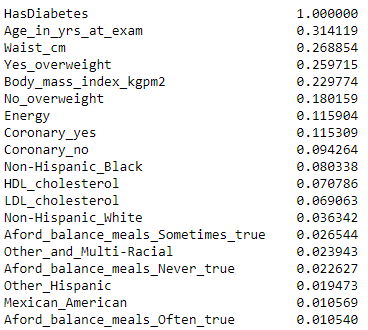

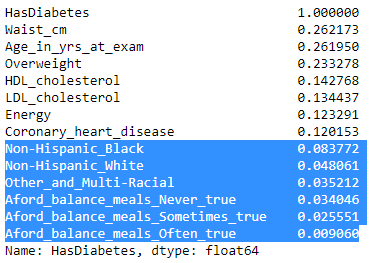

In [137]:
print('DONE')

DONE


Application: 
* Doctor - Reduce the amount of repeat. 
* Glucose no - Pre-indicator. 